<a href="https://colab.research.google.com/github/3306dw/Coba-Git01/blob/main/Backtesting_Saham1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import yfinance as yf
import pandas as pd

# Tentukan simbol saham di Bursa Efek Indonesia (misalnya, 'AAPL' untuk Apple)
saham_symbol = 'SILO.JK'  # Ganti dengan simbol saham yang diinginkan di BEI

# Tentukan rentang waktu yang diinginkan (misalnya, 1 hari terakhir)
start_date = '2023-01-02'
end_date = '2024-02-15'

# Dapatkan data historis detik menggunakan yfinance
saham_data = yf.download(saham_symbol, start=start_date, end=end_date, interval='1d')

# Tampilkan data
print(saham_data)


[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close    Adj Close   Volume
Date                                                            
2023-01-02  1260.0  1290.0  1260.0  1260.0  1246.115356   279400
2023-01-03  1260.0  1300.0  1260.0  1275.0  1260.950073    58600
2023-01-04  1275.0  1300.0  1255.0  1280.0  1265.894897   214700
2023-01-05  1270.0  1280.0  1250.0  1265.0  1251.060181   361600
2023-01-06  1265.0  1275.0  1245.0  1275.0  1260.950073   386500
...            ...     ...     ...     ...          ...      ...
2024-02-05  2390.0  2390.0  2290.0  2290.0  2290.000000  3737600
2024-02-06  2290.0  2390.0  2290.0  2350.0  2350.000000  4651500
2024-02-07  2350.0  2390.0  2260.0  2260.0  2260.000000  2625700
2024-02-12  2180.0  2350.0  2180.0  2240.0  2240.000000  2228200
2024-02-13  2320.0  2320.0  2210.0  2210.0  2210.000000  2320500

[268 rows x 6 columns]


In [14]:
import pandas as pd
import pandas_datareader as pdr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [15]:
saham = saham_data


In [16]:
saham['Target'] = np.where(saham['Close'].shift(-1) > saham['Close'], 1, 0)


In [21]:
fitur = saham[['Open', 'High', 'Low', 'Close', 'Volume']]
X_train, X_test, y_train, y_test = train_test_split(fitur, saham['Target'], test_size=0.2, random_state=42)



In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [24]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
prediksi = model.predict(X_test)



In [31]:
akurasi = accuracy_score(y_test, prediksi)
print(f'Akurasi: {akurasi}')

NameError: name 'accuracy_score' is not defined

In [27]:
saham['Prediksi'] = model.predict(scaler.transform(fitur))
saham['Hasil'] = saham['Target'] * saham['Prediksi']


In [28]:
saham['Keuntungan'] = saham['Close'].pct_change() * saham['Hasil'].shift(1)


In [29]:
saham['Akumulasi_Keuntungan'] = (1 + saham['Keuntungan']).cumprod()


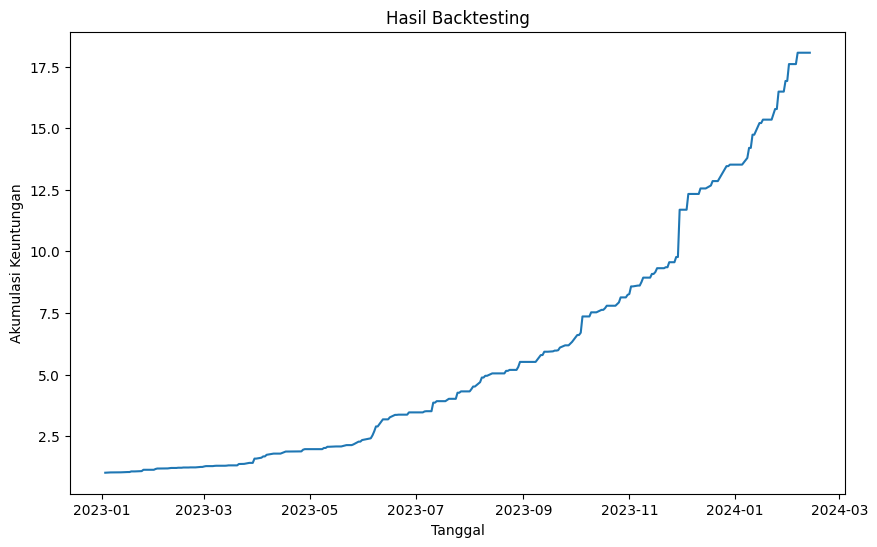

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(saham['Akumulasi_Keuntungan'])
plt.xlabel('Tanggal')
plt.ylabel('Akumulasi Keuntungan')
plt.title('Hasil Backtesting')
plt.show()
